# Dataset:

https://www.unhcr.org/refugee-statistics/download

In [1]:
# Import libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Refugee_df= pd.read_csv("persons_of_concern.csv")

In [3]:
Refugee_df.head()

,Year,Country of Asylum,Country of Origin,Country of Asylum ISO,Country of Origin ISO,Refugees,Returned Refugees,Asylum Seekers,IDPs,Returned IDPs,Stateless,HST,OOC
0,2023,Afghanistan,-,AFG,-,34826,0,250,3222397,31605,0,1584157,33712
1,2023,Albania,-,ALB,-,5079,0,8,0,0,2018,0,6
2,2023,Egypt,-,EGY,-,240507,841,232244,0,0,10,0,0
3,2023,Argentina,-,ARG,-,4104,0,7129,0,0,22,60765,475
4,2023,Armenia,-,ARM,-,150080,0,615,0,0,520,0,0


In [4]:
Refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   357 non-null    int64 
 1   Country of Asylum      357 non-null    object
 2   Country of Origin      357 non-null    object
 3   Country of Asylum ISO  357 non-null    object
 4   Country of Origin ISO  357 non-null    object
 5   Refugees               357 non-null    int64 
 6   Returned Refugees      357 non-null    int64 
 7   Asylum Seekers         357 non-null    int64 
 8   IDPs                   357 non-null    int64 
 9   Returned IDPs          357 non-null    int64 
 10  Stateless              357 non-null    int64 
 11  HST                    357 non-null    int64 
 12  OOC                    357 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 36.4+ KB


In [5]:
# Let us get some summary statistics

Refugee_df.describe()

,Year,Refugees,Returned Refugees,Asylum Seekers,IDPs,Returned IDPs,Stateless,HST,OOC
count,357.000000,3.570000e+02,357.000000,3.570000e+02,3.570000e+02,3.570000e+02,357.000000,3.570000e+02,3.570000e+02
mean,2023.501401,1.781344e+05,4161.347339,4.160946e+04,3.650007e+05,1.935140e+04,24443.826331,1.465515e+05,2.201747e+04
std,0.500700,4.881570e+05,24786.248477,2.257739e+05,1.332277e+06,1.327356e+05,120315.465427,1.234094e+06,1.825913e+05
min,2023.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2023.000000,3.770000e+02,0.000000,1.220000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,2024.000000,1.143900e+04,0.000000,1.978000e+03,0.000000e+00,0.000000e+00,5.000000,0.000000e+00,0.000000e+00
75%,2024.000000,1.125490e+05,809.000000,1.678600e+04,0.000000e+00,0.000000e+00,1691.000000,0.000000e+00,5.580000e+02
max,2024.000000,3.764517e+06,397061.000000,3.184161e+06,1.054022e+07,1.833092e+06,984591.000000,1.621703e+07,3.206577e+06


# Insights:

* The mean number is ~178,000 refugess across all countries considering both 2023 and 2024.
* Displacement is extremely uneven: The max refugees is ~3.76 million while mean is ~178,000, meaning that there is big disparity between nations.
* Much lower median at ~11,400, meaning a few countries have extremely high refugee populations, while others have relatively small one.
* IDP stands for Internally Displaced Persons (individuals forced to flee homes due to conflict or violence or other crises, but remain in the same nation). They have a higher average comapred to refugees, at ~356,000. But again, disparity is shown when we look at the median and see that it is zero! Even the 75% percentile is zero, meaning at least 75% of the countries have no recorded IDPs. So, diplacement is highly concentrated in certain regions.
* Returned refugees is only at ~4200, very low compared to the mean refugees.
* The mean asylum seeker is ~42,000, maximum  at a staggering ~3.2 million, meaning some specific countries see more migration requests from refugees.
* Stateless median (50th percentile) is 5, meaning at least half of the countries have 5 or fewer  statless individuals. While the max is nearly a million.
* Looking at the standard deviation across all of these, it is apparent that there is low conistency across these countries, especially IDPs.

Note that there are those whoe were forcibly displaced (refugees, asylum-seekers, other people in need of international protection and internally displaced people/IDPs). There are also stateless people (most who are not forcibly displaced).

In [6]:
Refugee_df.isnull().sum()

# No nulls that is good.

Year                     0
Country of Asylum        0
Country of Origin        0
Country of Asylum ISO    0
Country of Origin ISO    0
Refugees                 0
Returned Refugees        0
Asylum Seekers           0
IDPs                     0
Returned IDPs            0
Stateless                0
HST                      0
OOC                      0
dtype: int64

In [7]:
# But there are 2 columns that are empty let us remove them:

# Drop the columns
Refugee_df = Refugee_df.drop(columns=["Country of Origin", "Country of Origin ISO"])

In [8]:
Refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   357 non-null    int64 
 1   Country of Asylum      357 non-null    object
 2   Country of Asylum ISO  357 non-null    object
 3   Refugees               357 non-null    int64 
 4   Returned Refugees      357 non-null    int64 
 5   Asylum Seekers         357 non-null    int64 
 6   IDPs                   357 non-null    int64 
 7   Returned IDPs          357 non-null    int64 
 8   Stateless              357 non-null    int64 
 9   HST                    357 non-null    int64 
 10  OOC                    357 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 30.8+ KB


In [9]:
# Check duplicates:

num_duplicates = Refugee_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [10]:
# Visual inspection shows a 'Unknown' country let us remove it:

Refugee_df = Refugee_df[Refugee_df["Country of Asylum"].str.strip().str.lower() != "unknown"]



# EDA:

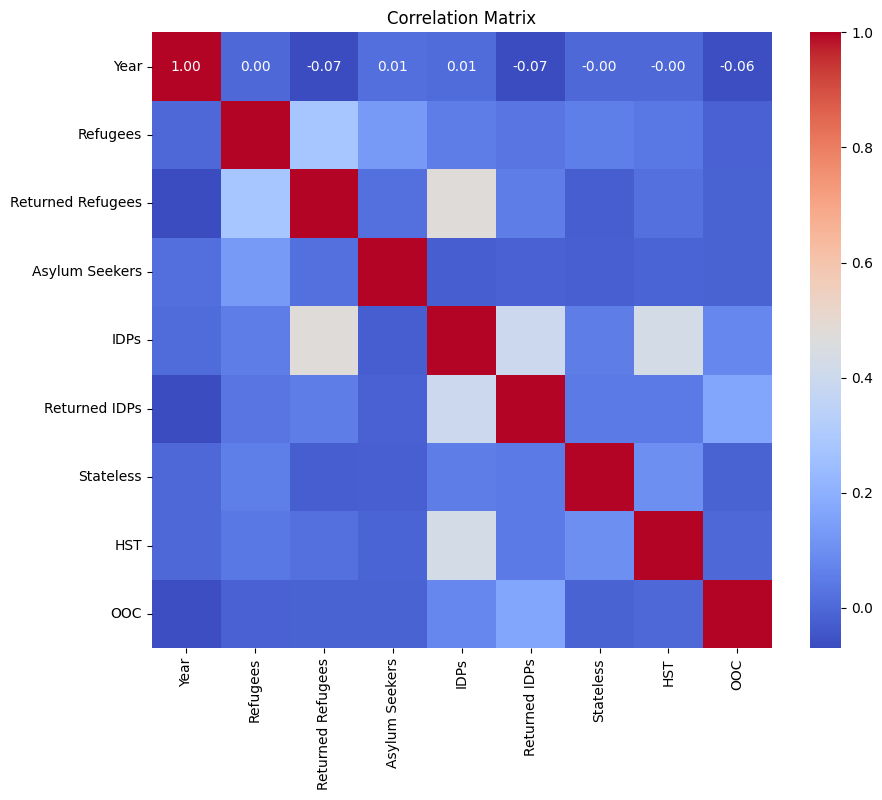

                       Year  Refugees  Returned Refugees  Asylum Seekers  \
Year               1.000000  0.000807          -0.070226        0.013653   
Refugees           0.000807  1.000000           0.277540        0.131137   
Returned Refugees -0.070226  0.277540           1.000000        0.019886   
Asylum Seekers     0.013653  0.131137           0.019886        1.000000   
IDPs               0.007255  0.052296           0.474383       -0.027862   
Returned IDPs     -0.069835  0.030730           0.051526       -0.019950   
Stateless         -0.000339  0.056934          -0.027873       -0.022872   
HST               -0.000044  0.041514           0.017762       -0.011404   
OOC               -0.062442 -0.019941          -0.013295       -0.015280   

                       IDPs  Returned IDPs  Stateless       HST       OOC  
Year               0.007255      -0.069835  -0.000339 -0.000044 -0.062442  
Refugees           0.052296       0.030730   0.056934  0.041514 -0.019941  
Returned Re

In [11]:
# Only include numeric columns for correlation otherwise I get error
import pandas as pd

# Select only numeric columns
numeric_df = Refugee_df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


print(correlation_matrix)


# Insights:

* Highest correlation between IDPs and Returned Refugees, IDPs and HST, OOC and Returned IDPs, and Refugees and Asylum Seekers in descending order.

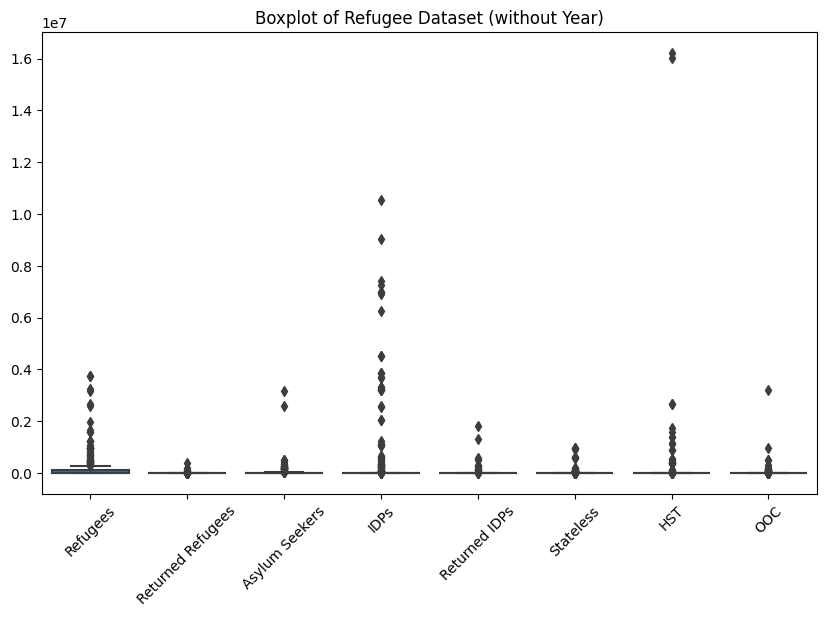

In [12]:
# Boxplot


Refugee_df_cleaned = Refugee_df.drop(columns=["Year"])


plt.figure(figsize=(10, 6))
sns.boxplot(data=Refugee_df_cleaned.select_dtypes(include='number'))


plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Boxplot of Refugee Dataset (without Year)")
plt.show()

# Insights:

* As can be seen by the significant outliers, there is huge disparity between the countries for every single feature.

In [13]:
# Now let us separate into two different datasets for the 2 years 2023 and 2024.


df_2023 = Refugee_df[Refugee_df["Year"] == 2023]
df_2024 = Refugee_df[Refugee_df["Year"] == 2024]


In [14]:
print(df_2023.info())
print(df_2023.info())

# 178 countries in each year, does not include all 195 countries

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   177 non-null    int64 
 1   Country of Asylum      177 non-null    object
 2   Country of Asylum ISO  177 non-null    object
 3   Refugees               177 non-null    int64 
 4   Returned Refugees      177 non-null    int64 
 5   Asylum Seekers         177 non-null    int64 
 6   IDPs                   177 non-null    int64 
 7   Returned IDPs          177 non-null    int64 
 8   Stateless              177 non-null    int64 
 9   HST                    177 non-null    int64 
 10  OOC                    177 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 16.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --

# Starting with 2023 analysis:


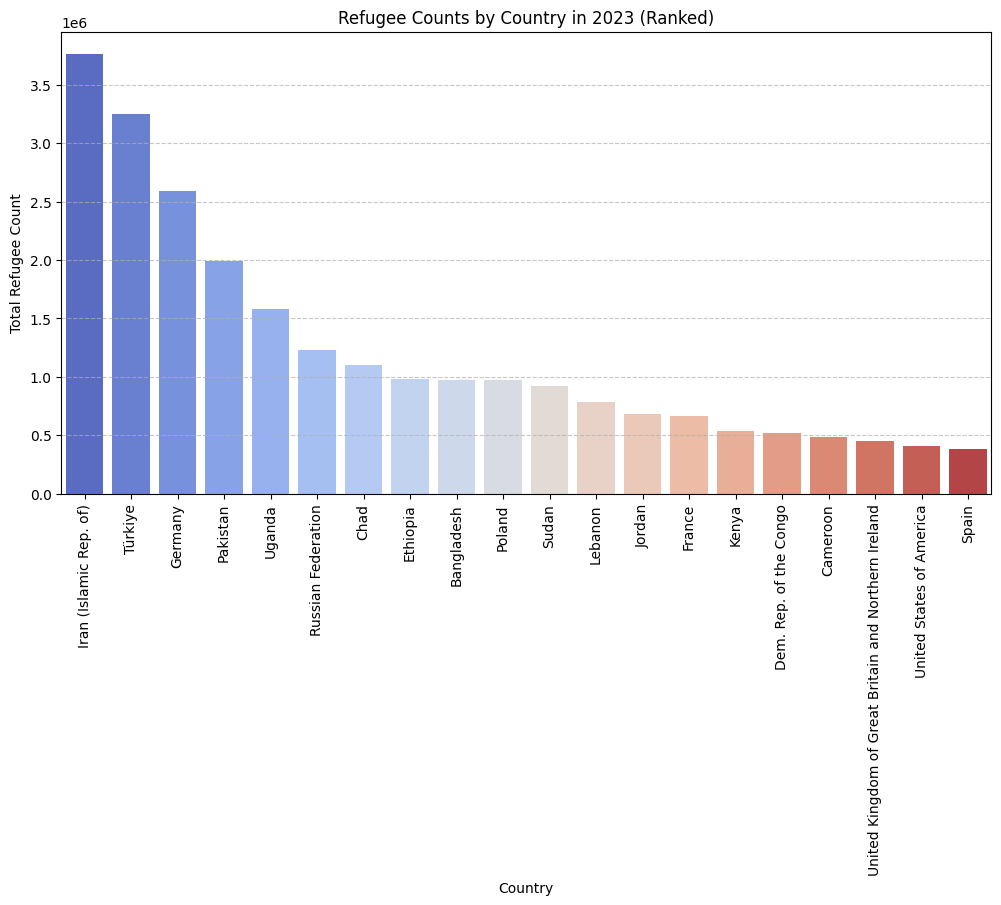

In [15]:
# Group by country and sum the refugee count for 2023 and sort it

country_refugee_counts_2023 = df_2023.groupby("Country of Asylum")["Refugees"].sum().reset_index()


country_refugee_counts_2023 = country_refugee_counts_2023.sort_values(by="Refugees", ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Country of Asylum", y="Refugees", data=country_refugee_counts_2023.head(20), palette="coolwarm")


# Improve visualization
plt.xticks(rotation=90)  
plt.title("Refugee Counts by Country in 2023 (Ranked)")
plt.xlabel("Country")
plt.ylabel("Total Refugee Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# 2023 Insights:

* Iran with the highest number of refugees, followed by Turkey and Germany.

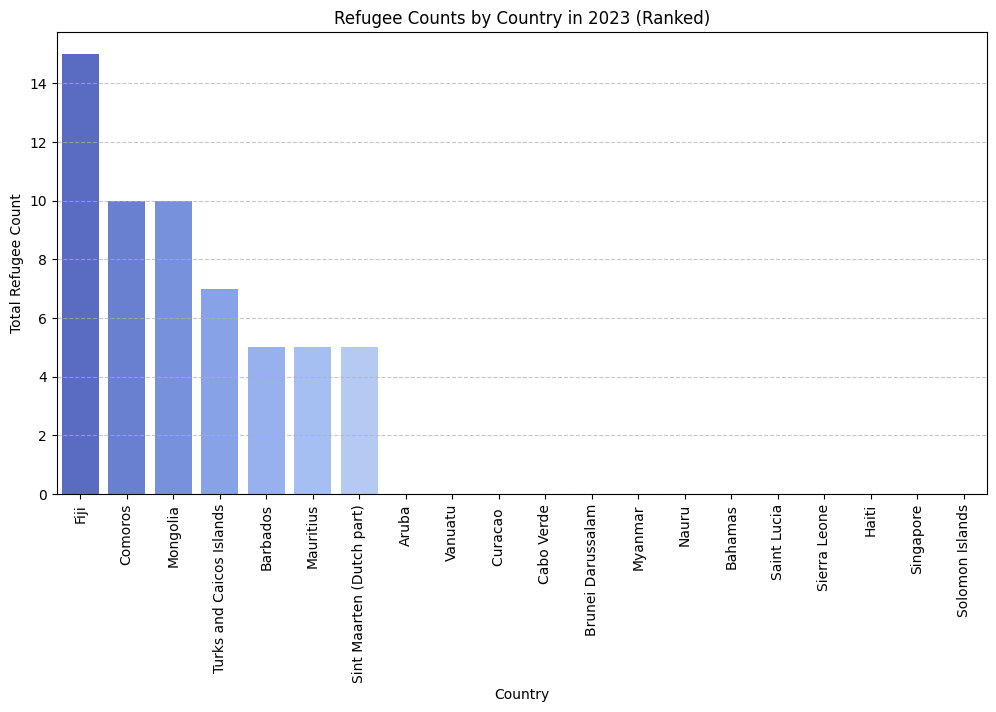

In [16]:
# Group by country and sum the refugee count for 2023 and sort it

country_refugee_counts_2023 = df_2023.groupby("Country of Asylum")["Refugees"].sum().reset_index()


country_refugee_counts_2023 = country_refugee_counts_2023.sort_values(by="Refugees", ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Country of Asylum", y="Refugees", data=country_refugee_counts_2023.tail(20), palette="coolwarm")


# Improve visualization
plt.xticks(rotation=90)  
plt.title("Refugee Counts by Country in 2023 (Ranked)")
plt.xlabel("Country")
plt.ylabel("Total Refugee Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Insights:

* Solomon Islands, Singapore, and Haiti with the lowest for 2023. 

# I made a new column in a new Excel file that has a new continent column that maps each country to a continent. I made it manually on Excel since it is easier than doing it here. This new file is also on the github page.
# Let us load this new data with the new continent column:

In [17]:
Refugee_df2= pd.read_csv("persons_of_concern v2.csv")

Ranking of continents by IDPs in 2023:
       Continent      IDPs
0         Africa  36397464
1           Asia  12660871
5  South America   6918373
3         Europe   3990013
4  North America   3189646
2      Australia     95000




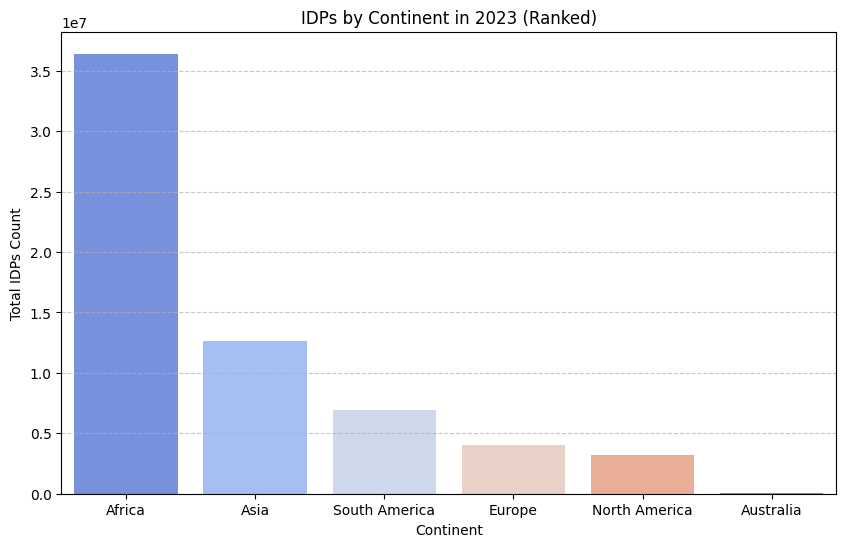

Ranking of continents by Returned IDPs in 2023:
       Continent  Returned IDPs
0         Africa        3141354
3         Europe        1318794
1           Asia         355304
4  North America         276612
2      Australia              0
5  South America              0




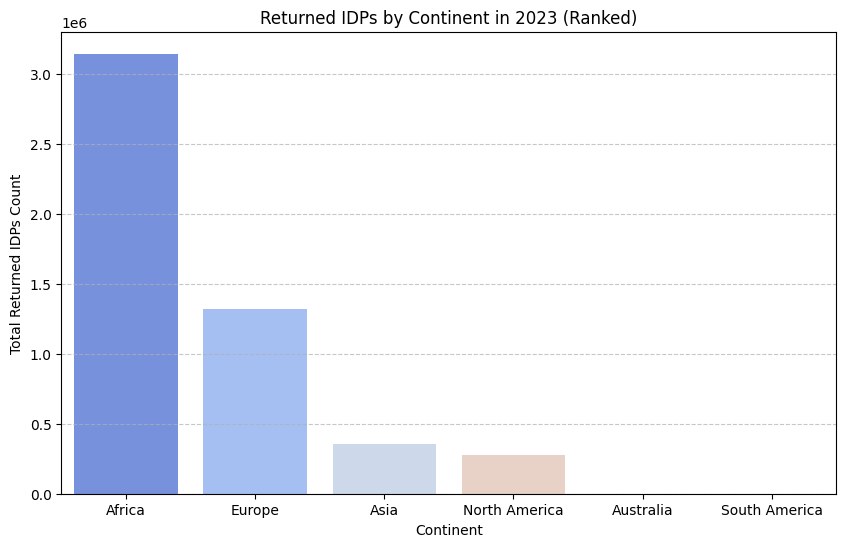

Ranking of continents by HST in 2023:
       Continent       HST
1           Asia  19025618
0         Africa   5631072
5  South America   1077954
4  North America    360696
2      Australia       134
3         Europe         0




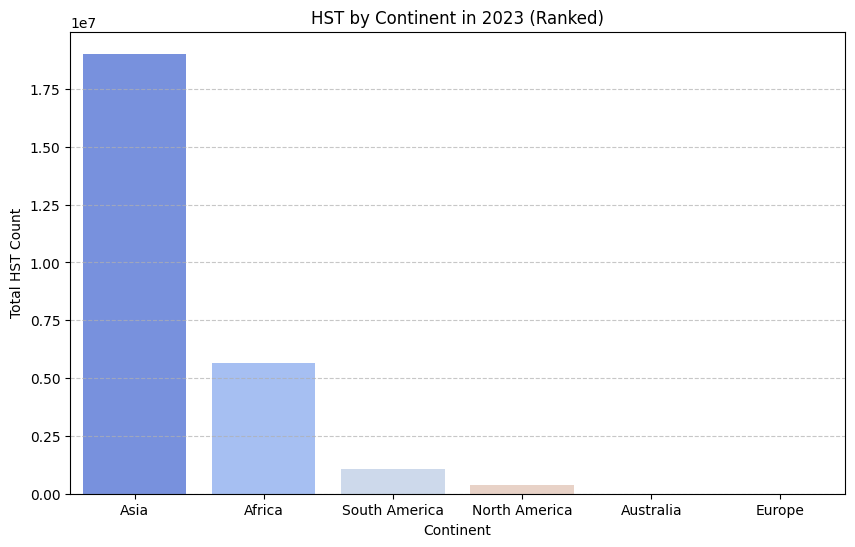

Ranking of continents by OOC in 2023:
       Continent      OOC
1           Asia  3458737
3         Europe   971862
5  South America   555268
0         Africa   487738
4  North America   468695
2      Australia     3250




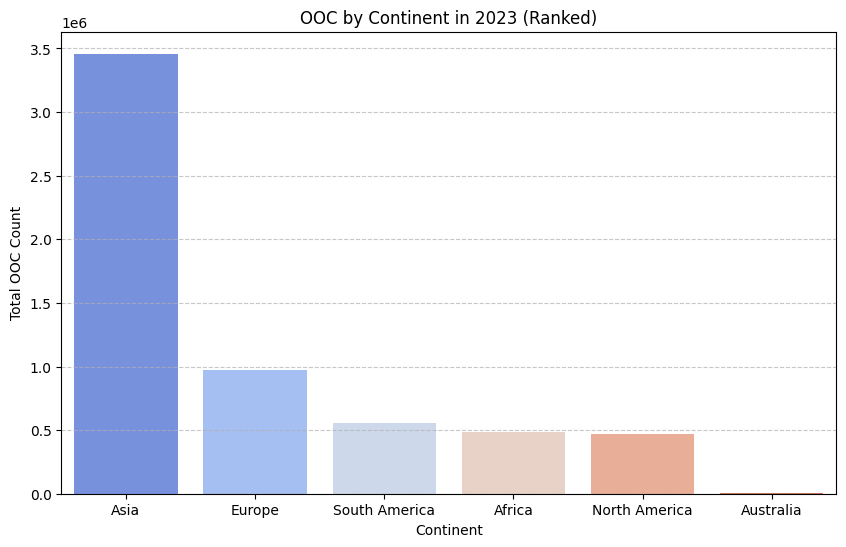

Ranking of continents by Asylum Seekers in 2023:
       Continent  Asylum Seekers
3         Europe         3794952
0         Africa         1286075
5  South America          661879
1           Asia          548497
4  North America          479329
2      Australia           87767




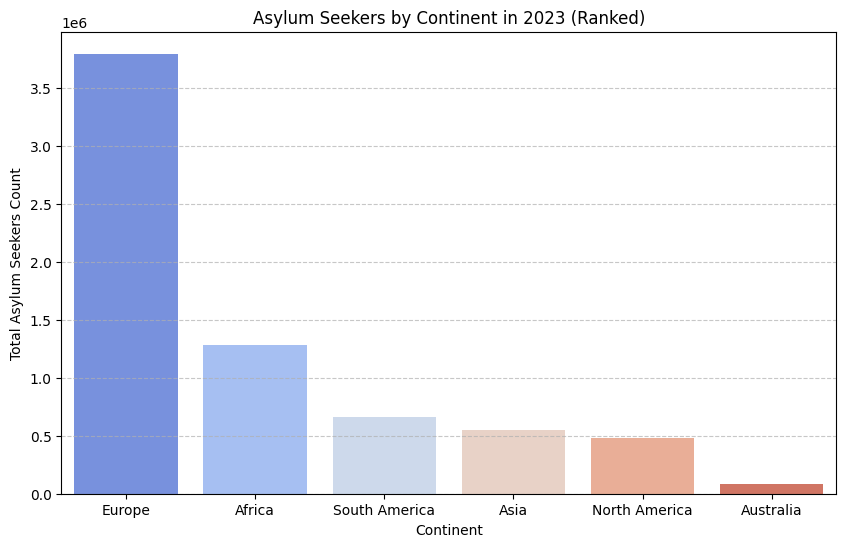

Ranking of continents by Refugees in 2023:
       Continent  Refugees
1           Asia  11704688
3         Europe   9932949
0         Africa   9163825
4  North America    396131
5  South America    392938
2      Australia     46877




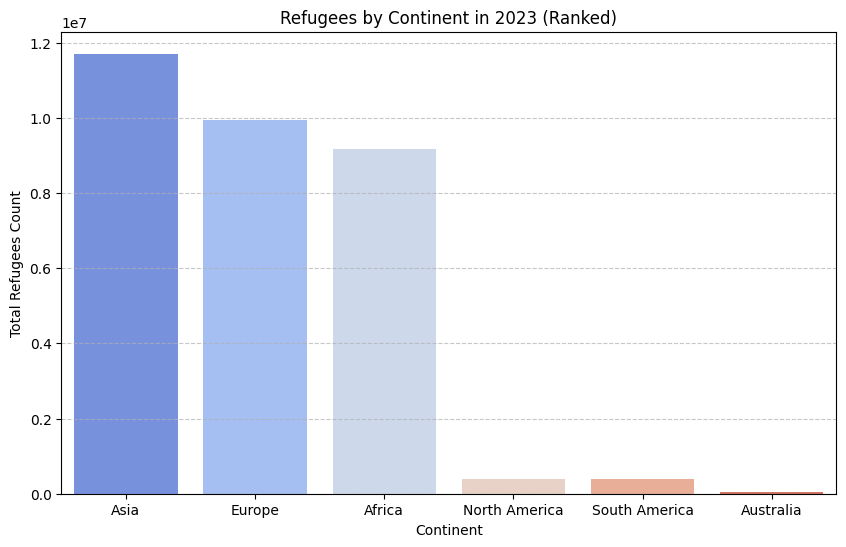

Ranking of continents by Returned Refugees in 2023:
       Continent  Returned Refugees
0         Africa             631198
3         Europe             307774
1           Asia              98220
4  North America               9114
5  South America                768
2      Australia                220




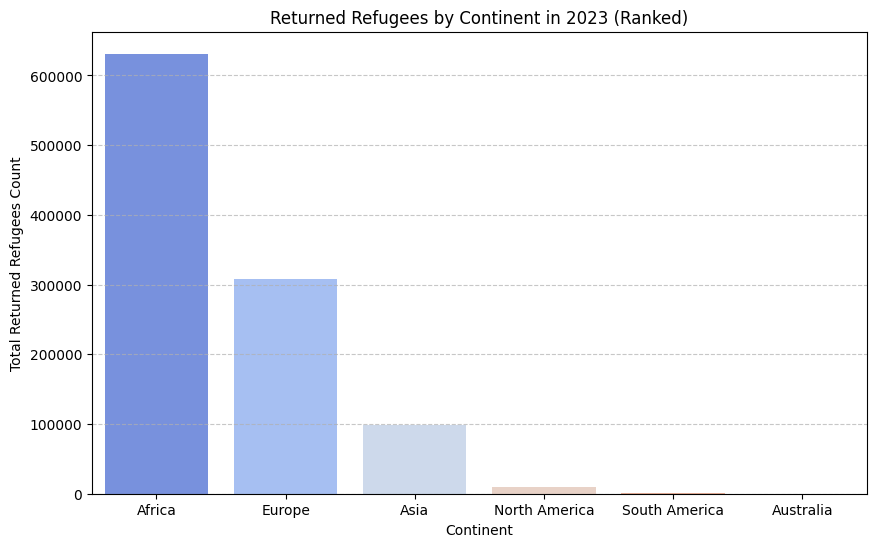

Ranking of continents by Stateless in 2023:
       Continent  Stateless
0         Africa    2077063
1           Asia    1071281
4  North America     708610
3         Europe     491355
2      Australia       8102
5  South America       1777




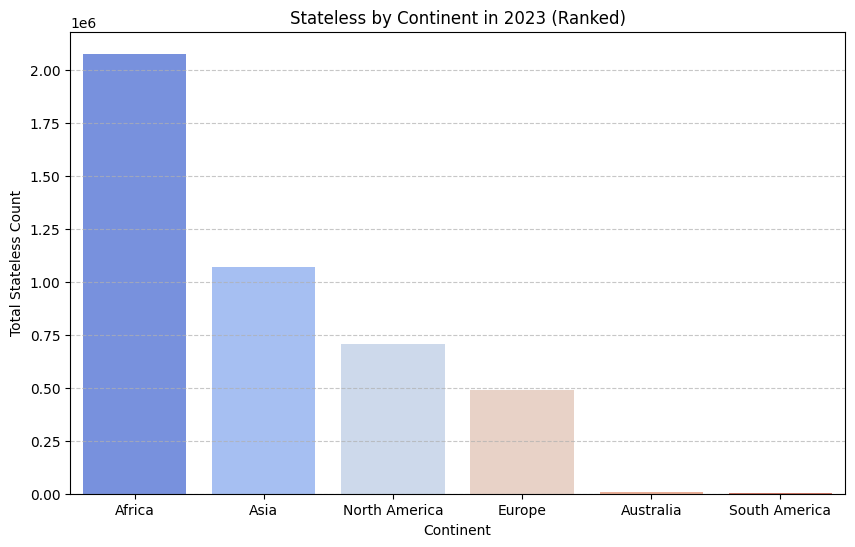

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of relevant columns
columns_to_visualize = ["IDPs", "Returned IDPs", "HST", "OOC", "Asylum Seekers", "Refugees", "Returned Refugees", "Stateless"]

# Filter dataset for only 2023
Refugee_df2_2023 = Refugee_df2[Refugee_df2["Year"] == 2023]


for column in columns_to_visualize:

    continent_counts = Refugee_df2_2023.groupby("Continent")[column].sum().reset_index()


    continent_counts = continent_counts.sort_values(by=column, ascending=False)

    # Display ranking
    print(f"Ranking of continents by {column} in 2023:")
    print(continent_counts)
    print("\n" + "="*50 + "\n")  

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Continent", y=column, data=continent_counts, palette="coolwarm")

    plt.title(f"{column} by Continent in 2023 (Ranked)")
    plt.xlabel("Continent")
    plt.ylabel(f"Total {column} Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()


# Insights (NB: Host community -> Those in the country that are hosting the displaced populations such as refugees).

* Highest IDPs Africa and Asia, lowest Australia and North America.
* Asia and Europe with the highest number of refugees. Australia and South Australia least.
* Africa and Asia with the highest number of stateless people. South America and Australia least.
* Africa and Europe highest returned refugees, Australia and South America least.
* Europe and Africa highest asylum seekers, Australia and North America least.
* Asia and Europe highest others of concern, Australia and North America least.
* Asia and Africa highest host community, Europe and Australia least.
* Africa and Europe highest returned IDPS, South America and Australia least.

# 2024 analysis:


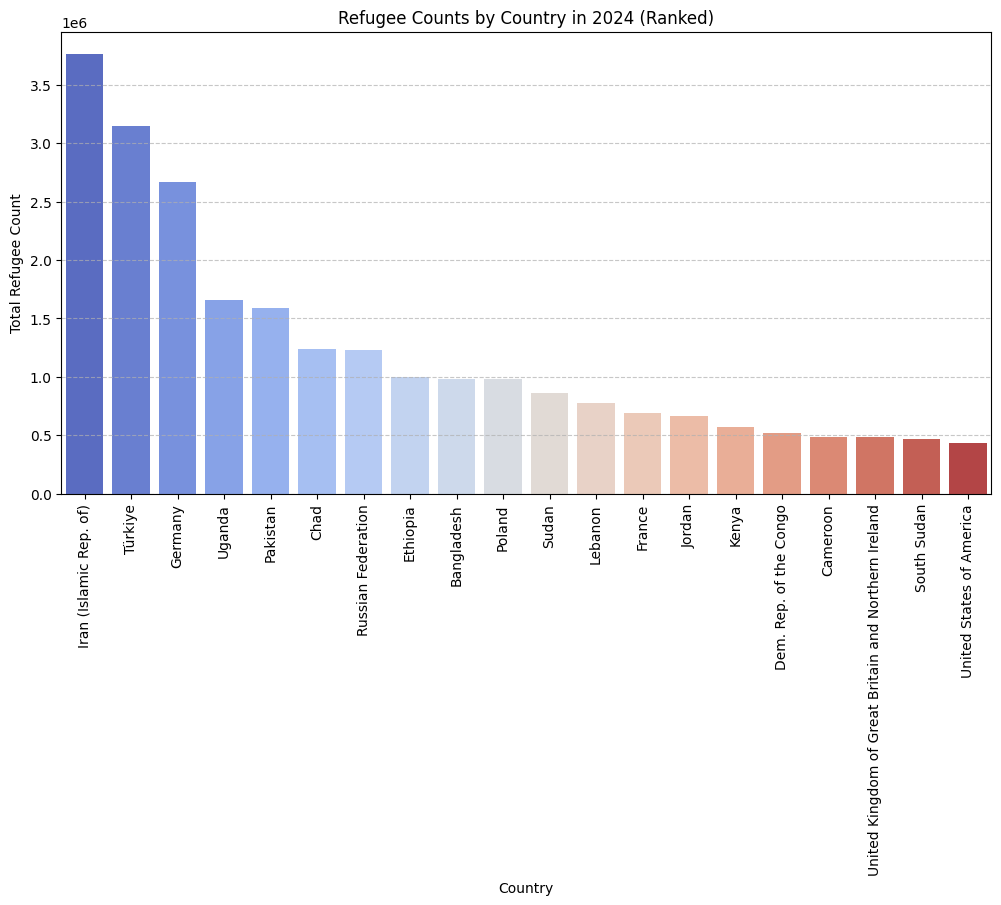

In [20]:
# Group by country and sum the refugee count for 2023 and sort it

country_refugee_counts_2024 = df_2024.groupby("Country of Asylum")["Refugees"].sum().reset_index()


country_refugee_counts_2024 = country_refugee_counts_2024.sort_values(by="Refugees", ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Country of Asylum", y="Refugees", data=country_refugee_counts_2024.head(20), palette="coolwarm")

plt.xticks(rotation=90)  
plt.title("Refugee Counts by Country in 2024 (Ranked)")
plt.xlabel("Country")
plt.ylabel("Total Refugee Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Insights:

# Same as 2023. Iran with the highest number of refugees, followed by Turkey and Germany.

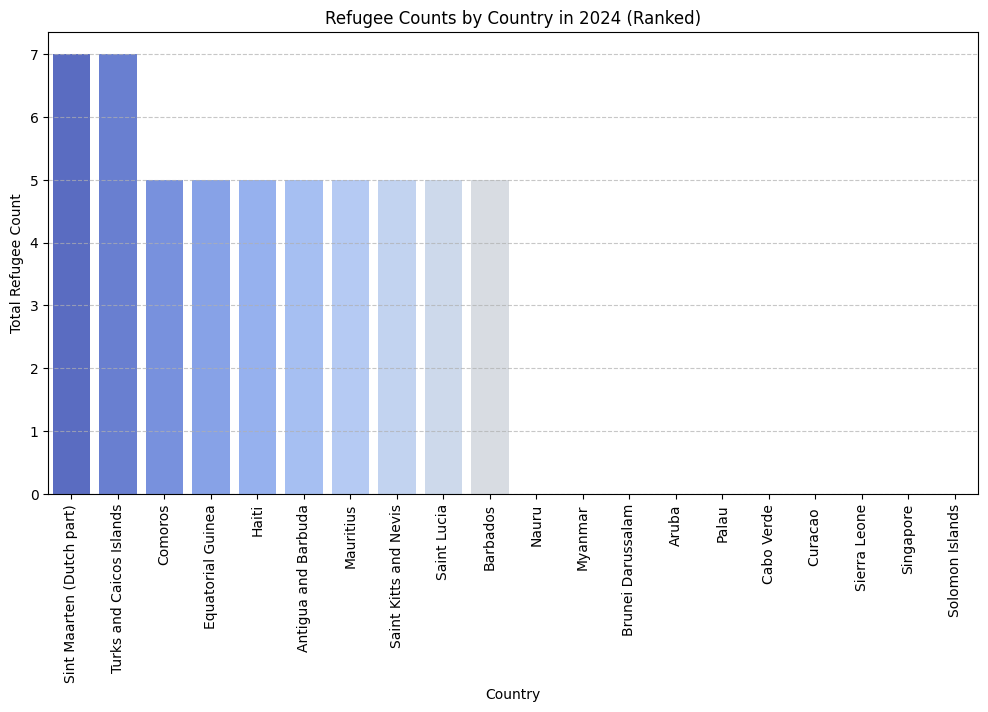

In [21]:
# Group by country and sum the refugee count for 2023 and sort it

country_refugee_counts_2024 = df_2024.groupby("Country of Asylum")["Refugees"].sum().reset_index()


country_refugee_counts_2024 = country_refugee_counts_2024.sort_values(by="Refugees", ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Country of Asylum", y="Refugees", data=country_refugee_counts_2024.tail(20), palette="coolwarm")


# Improve visualization
plt.xticks(rotation=90)  
plt.title("Refugee Counts by Country in 2024 (Ranked)")
plt.xlabel("Country")
plt.ylabel("Total Refugee Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Insights:

* Solomon Islands, Singapore, and Sierra Leone the least amount of refugees.

Ranking of continents by IDPs in 2024:
       Continent      IDPs
0         Africa  24602364
3         Europe  20063824
1           Asia  11519449
5  South America   7095289
4  North America   3772969
2      Australia         0




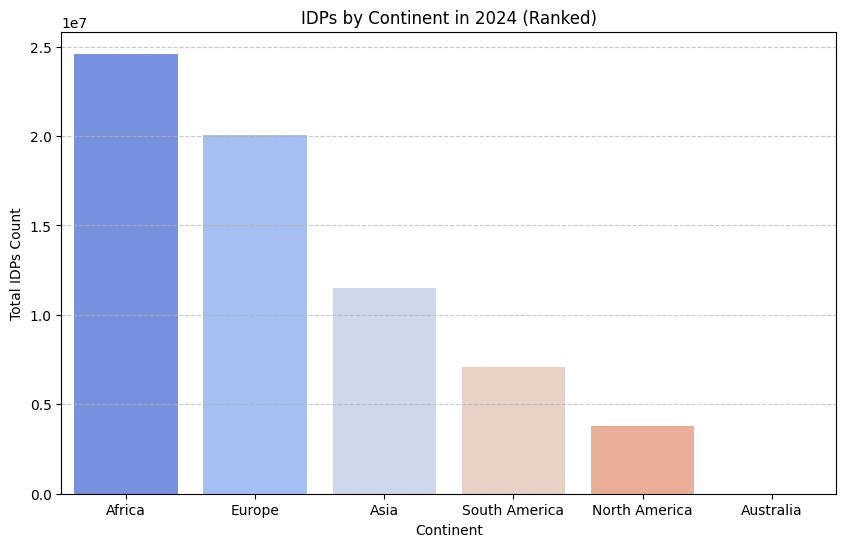

Ranking of continents by Returned IDPs in 2024:
       Continent  Returned IDPs
0         Africa         727547
3         Europe         698333
4  North America         251624
5  South America         115047
1           Asia          23836
2      Australia              0




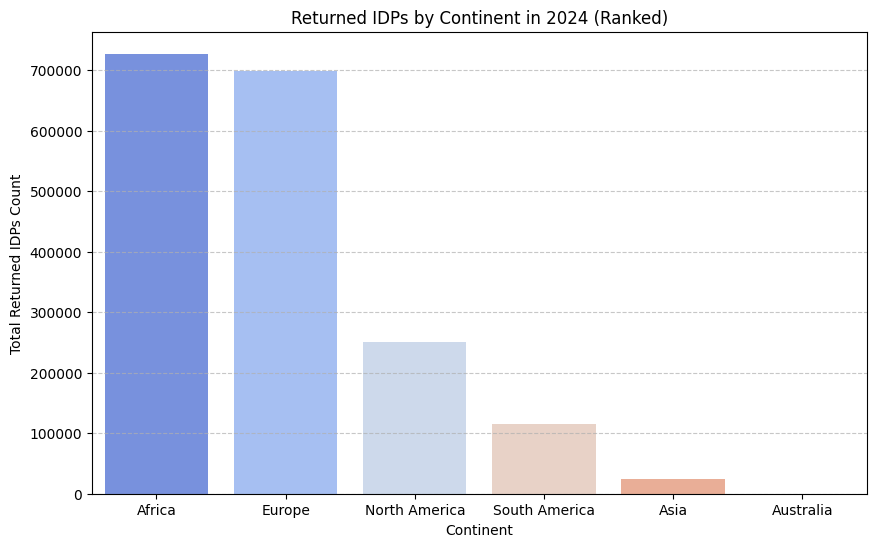

Ranking of continents by HST in 2024:
       Continent       HST
1           Asia  20295171
0         Africa   3096320
3         Europe   1632952
5  South America   1055477
4  North America    143479
2      Australia         0




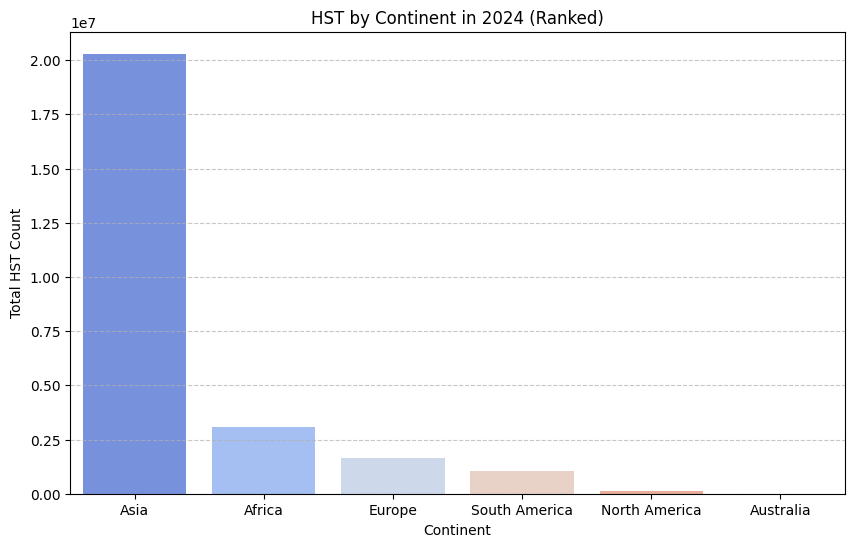

Ranking of continents by OOC in 2024:
       Continent     OOC
0         Africa  516850
3         Europe  512464
5  South America  364827
4  North America  299243
1           Asia  218914
2      Australia    2388




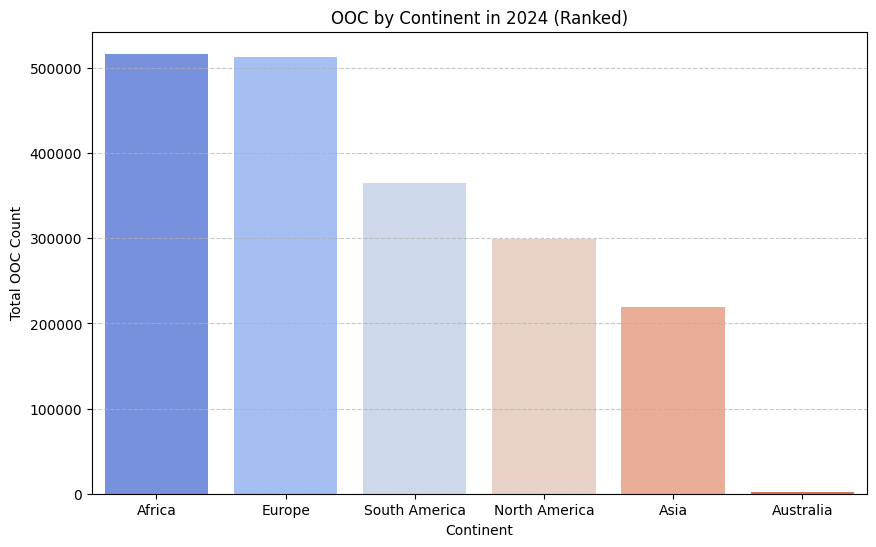

Ranking of continents by Asylum Seekers in 2024:
       Continent  Asylum Seekers
4  North America         3731344
0         Africa         1864657
1           Asia          908472
3         Europe          704720
5  South America          680712
2      Australia          106172




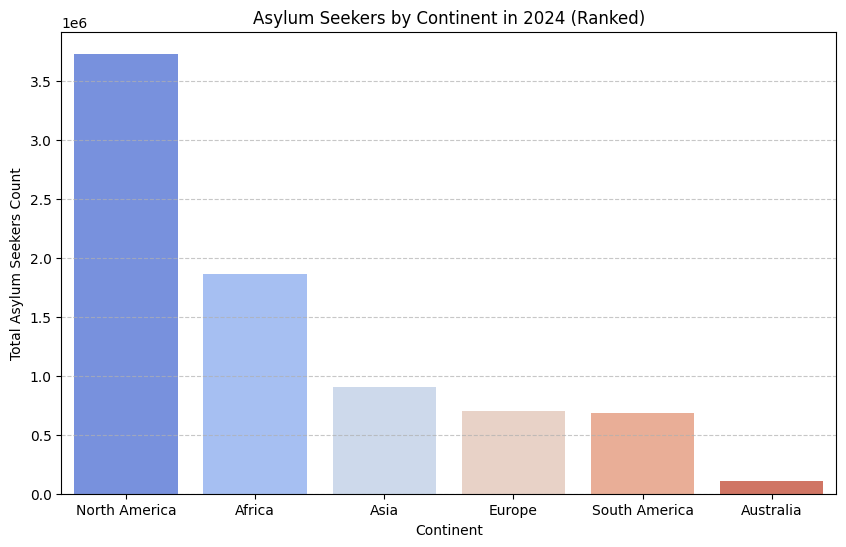

Ranking of continents by Refugees in 2024:
       Continent  Refugees
1           Asia  12228372
0         Africa   9452065
3         Europe   7683770
2      Australia   1099250
4  North America    959409
5  South America    533718




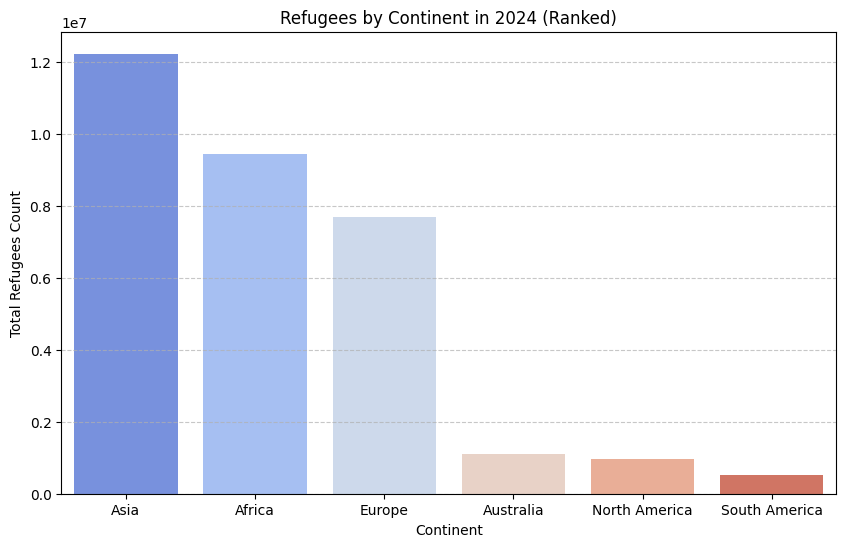

Ranking of continents by Returned Refugees in 2024:
       Continent  Returned Refugees
3         Europe             256541
0         Africa             102273
1           Asia              56223
2      Australia              16944
5  South America                705
4  North America                  0




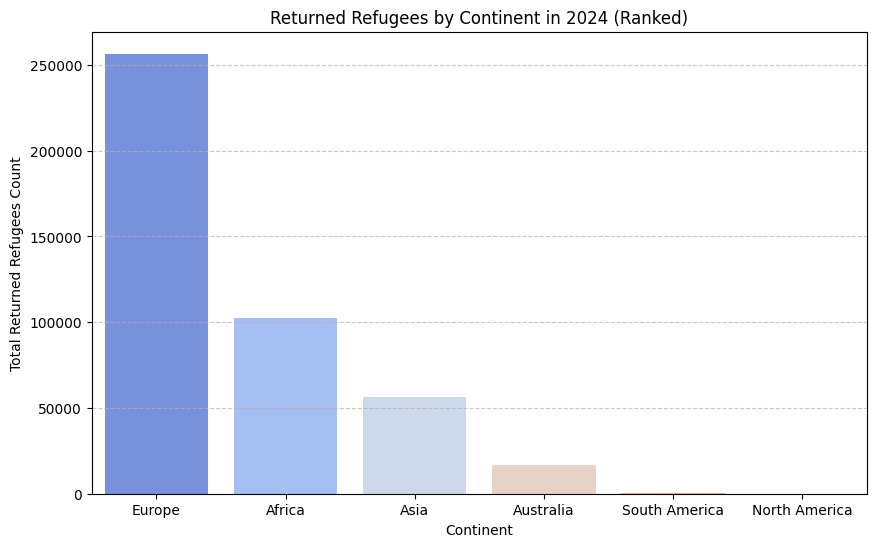

Ranking of continents by Stateless in 2024:
       Continent  Stateless
1           Asia    2064774
0         Africa    1101970
4  North America     715896
3         Europe     453528
5  South America      20430
2      Australia      11660




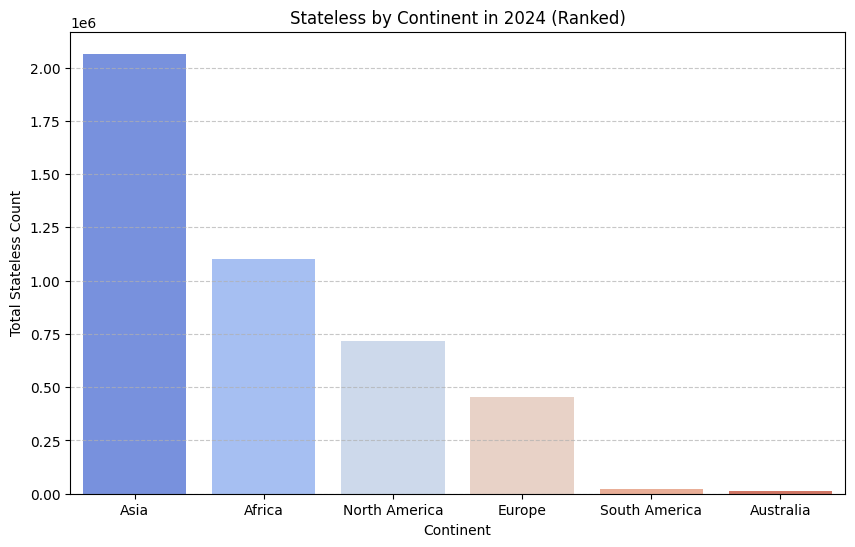

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of relevant columns
columns_to_visualize = ["IDPs", "Returned IDPs", "HST", "OOC", "Asylum Seekers", "Refugees", "Returned Refugees", "Stateless"]

# Filter dataset for only 2024
Refugee_df2_2024 = Refugee_df2[Refugee_df2["Year"] == 2024]


for column in columns_to_visualize:
    # Group by continent and sum the values for 2024
    continent_counts = Refugee_df2_2024.groupby("Continent")[column].sum().reset_index()

    # Sort in descending order
    continent_counts = continent_counts.sort_values(by=column, ascending=False)

    # Display ranking
    print(f"Ranking of continents by {column} in 2024:")
    print(continent_counts)
    print("\n" + "="*50 + "\n")  # Separator for readability

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Continent", y=column, data=continent_counts, palette="coolwarm")

    plt.title(f"{column} by Continent in 2024 (Ranked)")
    plt.xlabel("Continent")
    plt.ylabel(f"Total {column} Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()


# Insights:

* Highest IDPs Africa and Europe, lowest Australia and North America.
* Asia and Africa with the highest number of refugees. South America and North America least.
* Asia and Africa with the highest number of stateless people. Australia and South America least.
* Europe and Africa highest returned refugees,  North and South America least.
* North America and Africa highest asylum seekers, Australia and Suuth America least.
* Africa and Europe highest others of concern, Australia and Asia least.
* Asia and Africa highest host community, Australia and North America least.
* Africa and Europe highest returned IDPS, Australia and Asia least.

### Comparing both 2 years directly using side by side bar chart and line plots:

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Figure size 1200x600 with 0 Axes>

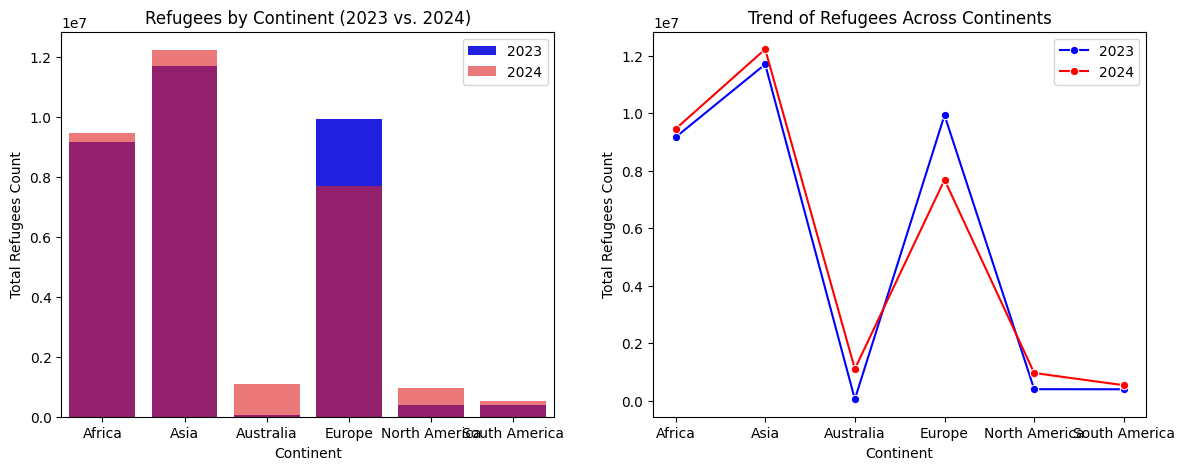

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

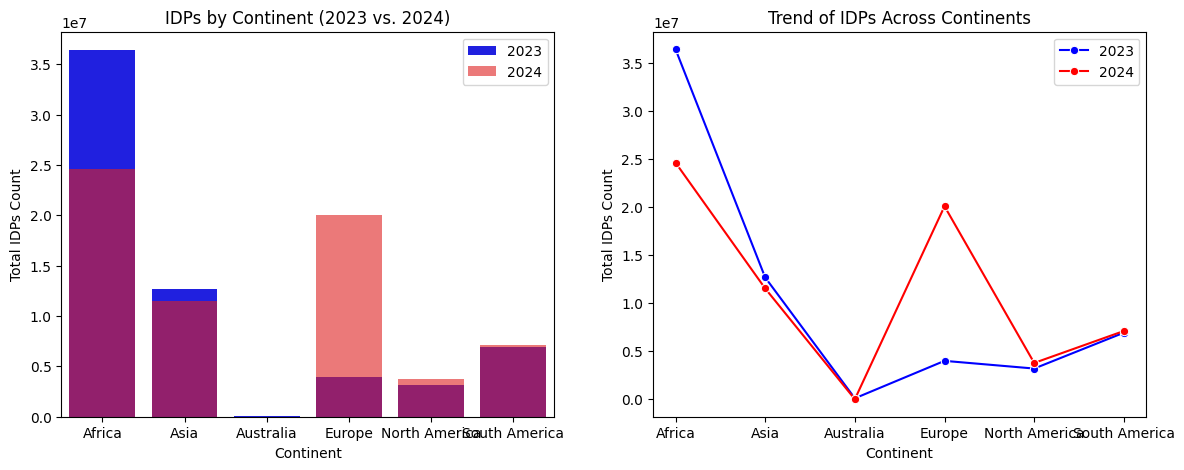

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

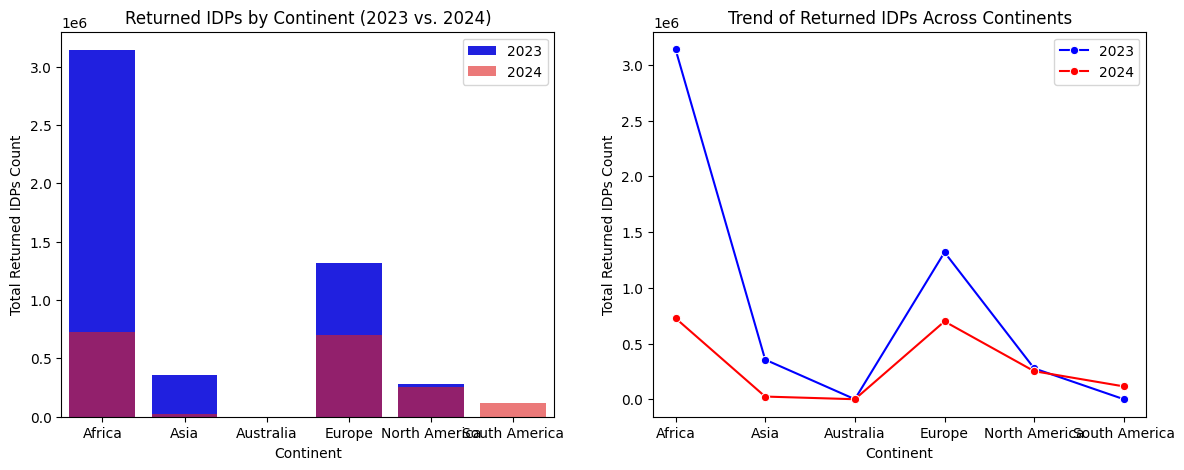

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

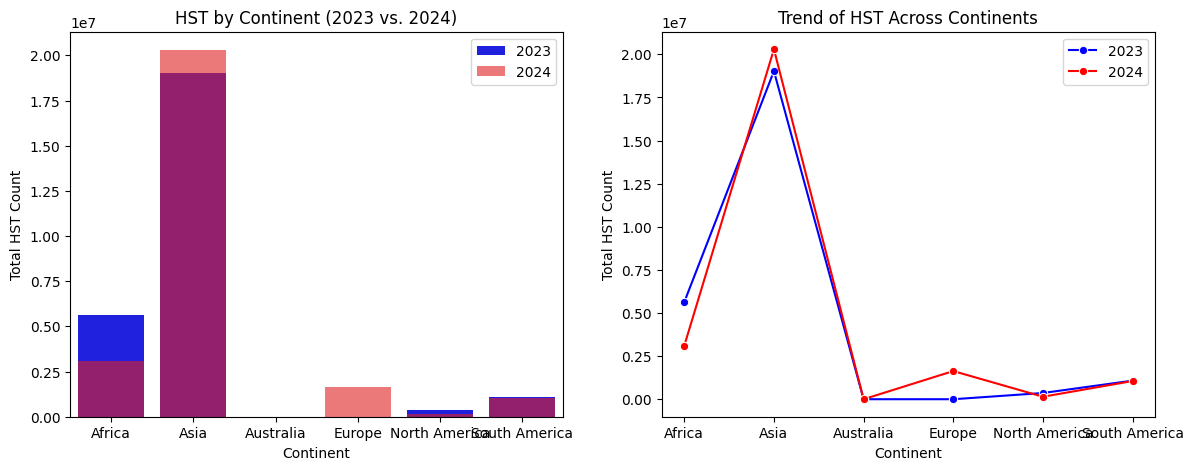

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

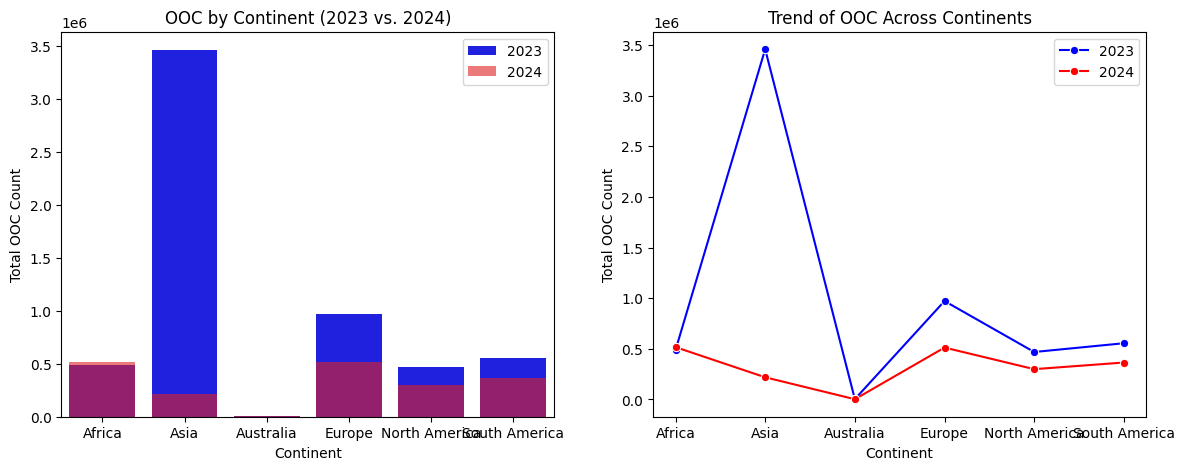

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

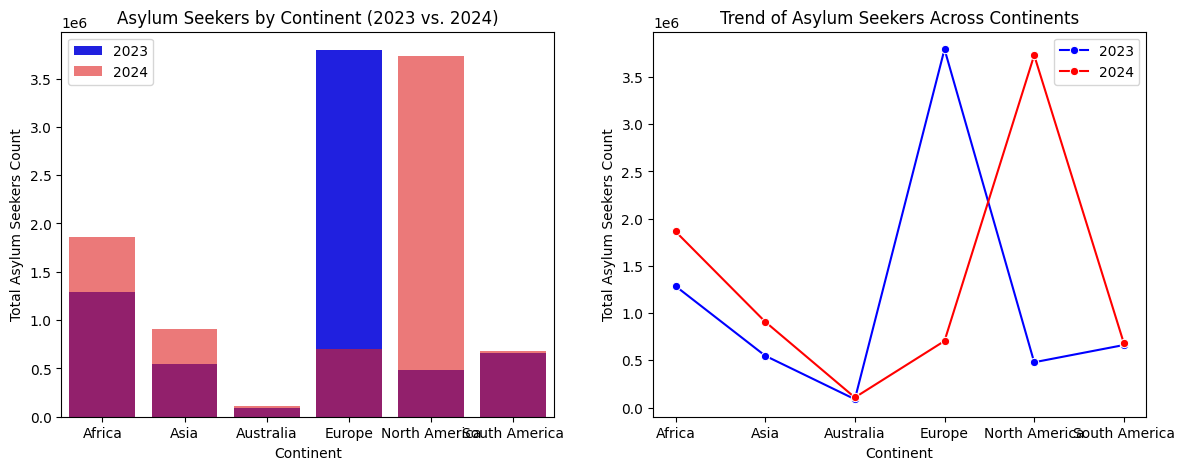

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

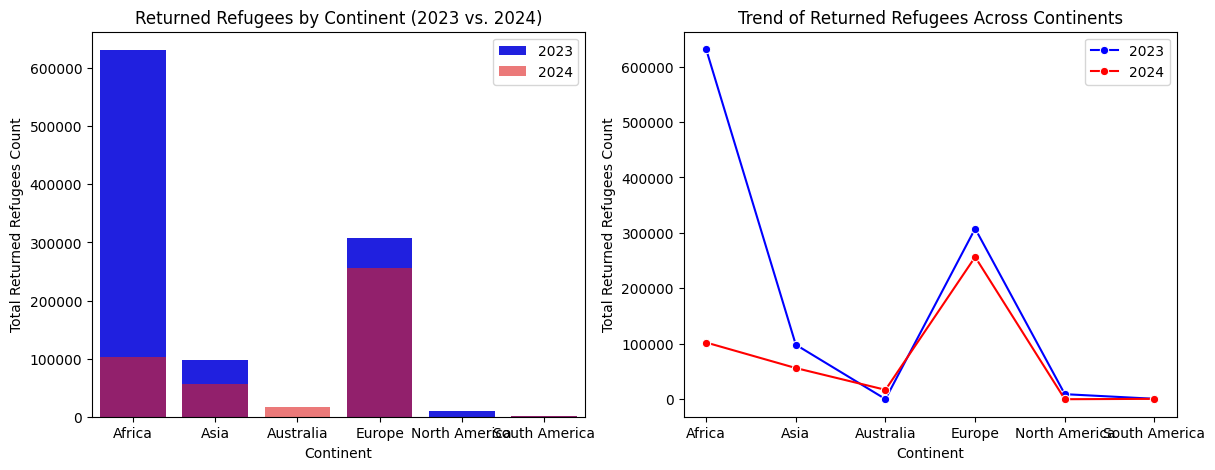

C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Faisal\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

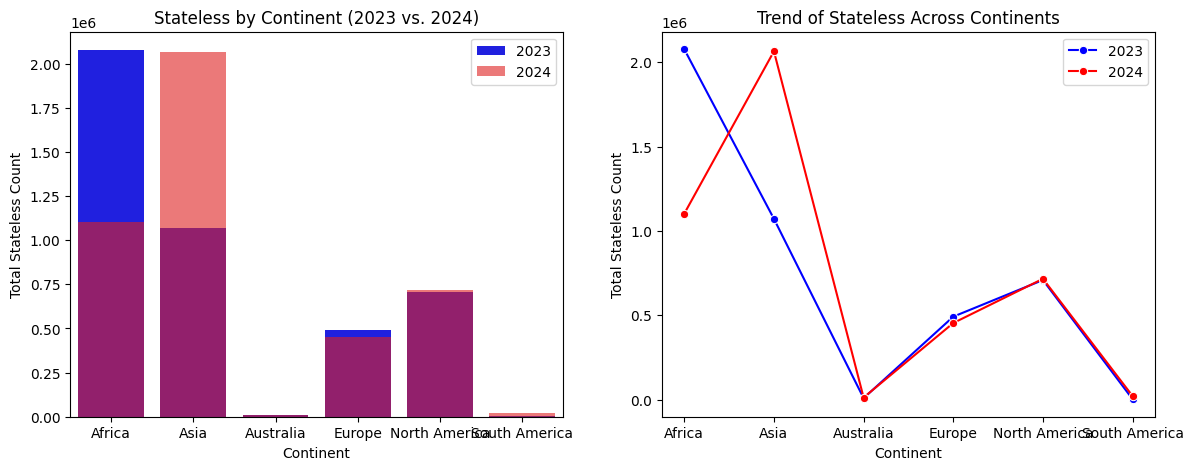

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Filter dataset for 2023 and 2024
df_2023 = Refugee_df2[Refugee_df2["Year"] == 2023]
df_2024 = Refugee_df2[Refugee_df2["Year"] == 2024]

# List of variables for comparison
variables_to_compare = ["Refugees", "IDPs", "Returned IDPs", "HST", "OOC", "Asylum Seekers", "Returned Refugees", "Stateless"]

# Set plot size
plt.figure(figsize=(12, 6))


for variable in variables_to_compare:

    data_2023 = df_2023.groupby("Continent")[variable].sum().reset_index()
    data_2024 = df_2024.groupby("Continent")[variable].sum().reset_index()

    # Merge datasets
    comparison_df = data_2023.merge(data_2024, on="Continent", suffixes=("_2023", "_2024"))

    # Create a subplot for each variable
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # 1. Barplot for absolute values
    sns.barplot(x="Continent", y=f"{variable}_2023", data=comparison_df, ax=ax[0], color="blue", label="2023")
    sns.barplot(x="Continent", y=f"{variable}_2024", data=comparison_df, ax=ax[0], color="red", alpha=0.6, label="2024")
    ax[0].set_title(f"{variable} by Continent (2023 vs. 2024)")
    ax[0].set_xlabel("Continent")
    ax[0].set_ylabel(f"Total {variable} Count")
    ax[0].legend()

    # 2. Line plot for trends
    sns.lineplot(x=comparison_df["Continent"], y=comparison_df[f"{variable}_2023"], marker="o", ax=ax[1], color="blue", label="2023")
    sns.lineplot(x=comparison_df["Continent"], y=comparison_df[f"{variable}_2024"], marker="o", ax=ax[1], color="red", label="2024")
    ax[1].set_title(f"Trend of {variable} Across Continents")
    ax[1].set_xlabel("Continent")
    ax[1].set_ylabel(f"Total {variable} Count")
    ax[1].legend()
    
    plt.show()


# Insights:

* Africa stateless decreased significantly in 2024 (almost ha).)ed
* Africa returned refugees decreased significantly in 2024.
* Africa returned IDPs decreased significantly in 242).
* Asia stateless increased significantly in 2024 (almostuud)d)ble
* Asia others of concern decreased significantly i024.d).
* Australia refugees increased significantly in 2024.
* Europe IDPs increasing significantly in  2024.
* Europe HST increased signifi inntly i
* Europe asylum seekers increased significantly in 2024.



#  Link to help:

https://shop.unrefugees.org.uk/